# Posterior Approximation for a Markov model for Graph

We can express a Markov model dedicated to graphs as an exponential model :

$$P(y | n \theta) = exp[\theta_1 t_{edge}(y) + \theta_2 t_{2-star} + \theta_3 t_{triangle}] $$

Where $y$ is a **graph realisation (an observation)**
* $t[y] = [t_{edge}(y), t_{2-star}, t_{triangle}]$ the vector of sufficient statistics: $t_{edge}(y) = edge\_count(y),  t_{2-star} = 2star\_count(y), t_{triangle} = triangle\_count(y)$

And then express the posterior distribution of $\theta$ for a Markov model:

$$P(\theta | y, n) \propto P(y | n, \theta) p(\theta) = exp[\theta_1 t_{edge}(y) + \theta_2 t_{2-star} + \theta_3 t_{triangle}] P(\theta)$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from math import exp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from statsmodels.graphics.tsaplots import plot_acf
import networkx as nx

In [2]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    theta_edge = [d[0] for d in data]
    theta_two_star = [d[1] for d in data]
    theta_triangle = [d[2] for d in data]
    
    data_frame = pd.DataFrame({'theta_edge': theta_edge,
                               'theta_two_star': theta_two_star,
                               'theta_triangle': theta_triangle
                              })
    
    return data_frame


def summary(data):
    
    for i in [25,50,75]:
        print("========== Q{} ==========".format(i))
        q_edge = np.percentile(data['theta_edge'], i)
        print("Q{} for edge parameter {}".format(i, q_edge))
    
        q_two_star = np.percentile(data['theta_two_star'], i)
        print("Q{} for two-star parameter {}".format(i, q_two_star))
    
        q_triangle = np.percentile(data['theta_two_star'], i)
        print("Q{} for triangle parameter {}".format(i, q_triangle))
    
def plot_marginals(data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    col_names = data_abc.columns.values
    
    fig, axs = plt.subplots(len(col_names), 2, figsize=(14,25))
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        # Sample parameter
        params = data_abc[param_name].tolist()[burn_in::by]

        # Distribution
        sns.distplot(params, axlabel="{} distribution ABC".format(param_name), ax=axs[i, 0])

        # Path
        axs[i, 1].plot(range(len(params)), params)
        axs[i, 1].set(xlabel='iterations', ylabel='{} parameter ABC'.format(param_name))

def plot_dist(data, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    theta_edge = data['theta_edge'].tolist()[burn_in::by]
    theta_two_star = data['theta_two_star'].tolist()[burn_in::by]
    theta_triangle = data['theta_triangle'].tolist()[burn_in::by]
    
    data_sampled = pd.DataFrame({'theta_edge': theta_edge,
                               'theta_two_star': theta_two_star,
                               'theta_triangle': theta_triangle
                              })
    
    g = sns.PairGrid(data_sampled, height=5)
    g = g.map_upper(plt.scatter)
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)


def autocor(data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    col_names = data_abc.columns.values
    fig, axs = plt.subplots(len(col_names), 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        params = data_abc[param_name].tolist()[burn_in::by]
    
        plot_acf(params, ax=axs[i])
        axs[i].set_title("Autocorrelation for {} parameter".format(param_name))
    
   

# Florence Families graph experimentation

* sample size : $size=16$ nodes
* $theta_0 = [-1.58763, -0.01993, 0.19097]$ (initiated with MCMCML estimation)
* $y = Florence\_Families\_graph$
* $\Delta=[0.05,0.05,0.05]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 100$

### Observation : Florence Families graph

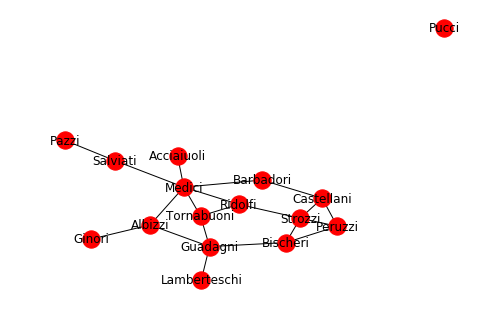

In [3]:
g = nx.florentine_families_graph()
g.add_node('Pucci')

nx.draw(g, with_labels=True)

In [4]:
FILE_NAME = 'assets/exp1.json'
data = extract_from_file(FILE_NAME)

In [5]:
summary(data)

========== Q25 ==========
Q25 for edge parameter -1.4175581020955652
Q25 for two-star parameter 0.2835916384695116
Q25 for triangle parameter 0.2835916384695116
========== Q50 ==========
Q50 for edge parameter -1.098820846679639
Q50 for two-star parameter 0.7804817122001909
Q50 for triangle parameter 0.7804817122001909
========== Q75 ==========
Q75 for edge parameter -0.6687672920936987
Q75 for two-star parameter 1.2379560685449063
Q75 for triangle parameter 1.2379560685449063


In [6]:
for i, n in np.ndenumerate(data.columns.values):
    print(i[0])
    print(n)

0
theta_edge
1
theta_two_star
2
theta_triangle


In [7]:
len(data.columns.values)

3

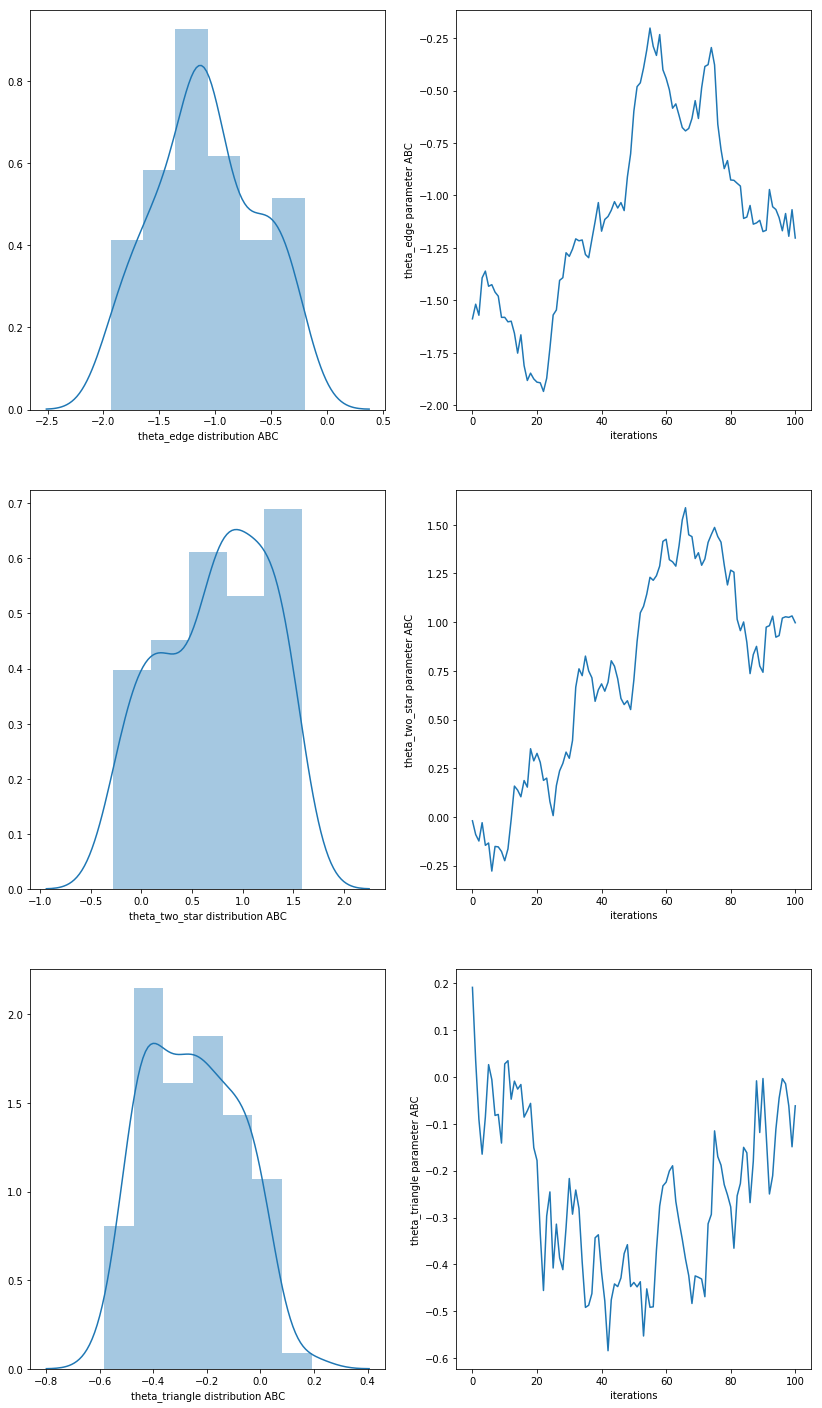

In [8]:
plot_marginals(data, by=100)

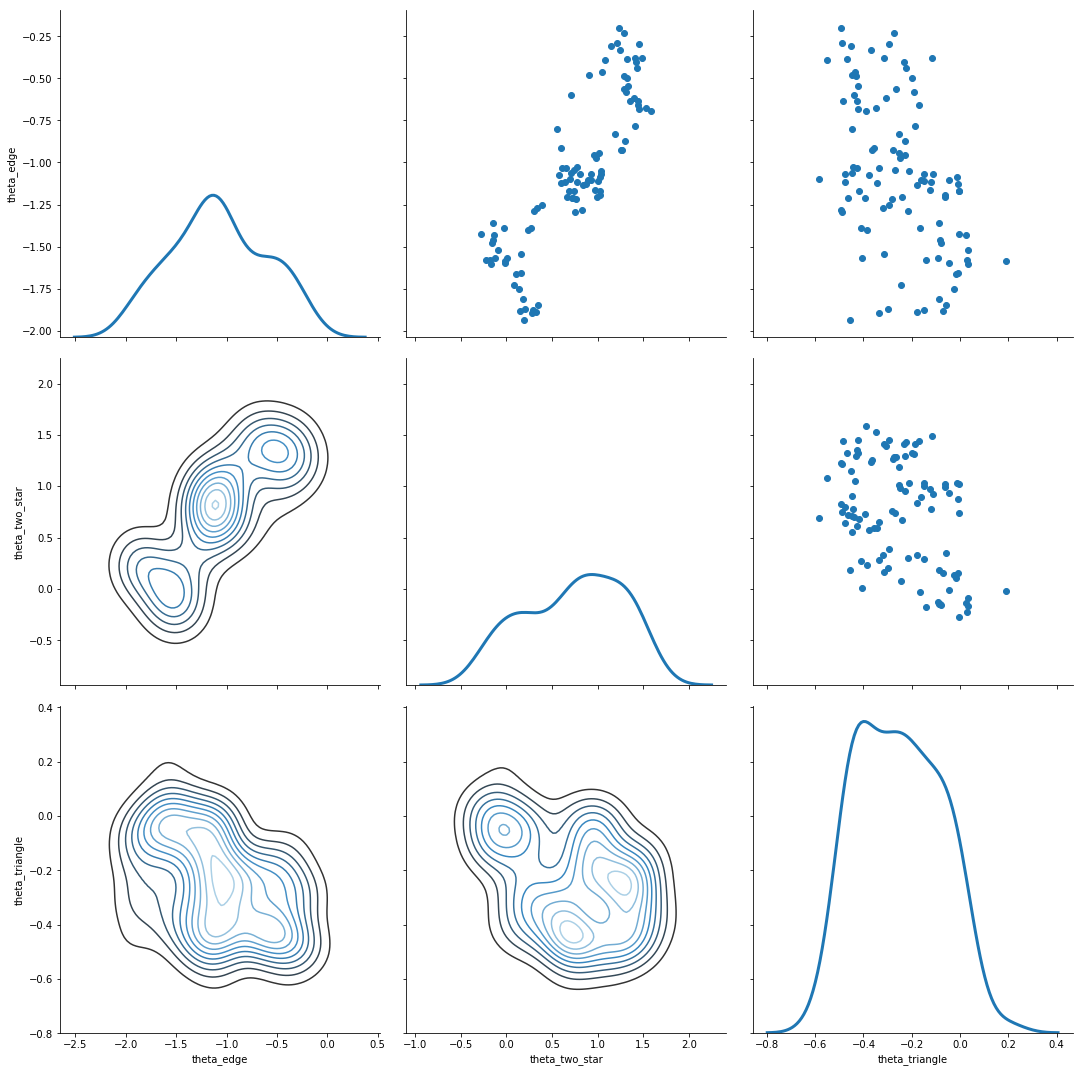

In [9]:
plot_dist(data, by=100)

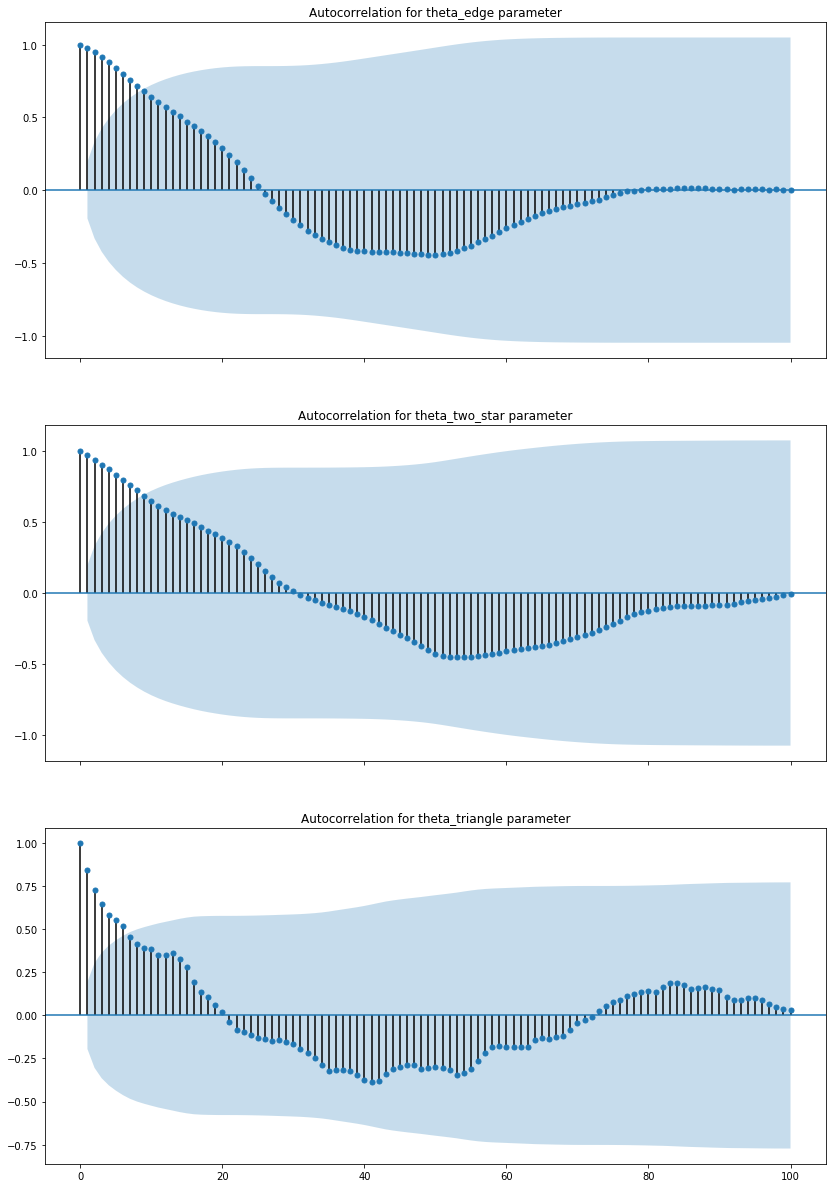

In [10]:
autocor(data, by=100)

## Experimentation #2
* sample size : $size=16$ nodes
* $theta_0 = [-1.58763, -0.01993, 0.19097]$ (initiated with MCMCML estimation)
* $y \sim Metropolis\_Hasting(theta_0, iter=100)$
* $\Delta=[0.05,0.05,0.05]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 100$

In [14]:
FILE_NAME2 = 'assets/exp2.json'
data2 = extract_from_file(FILE_NAME2)

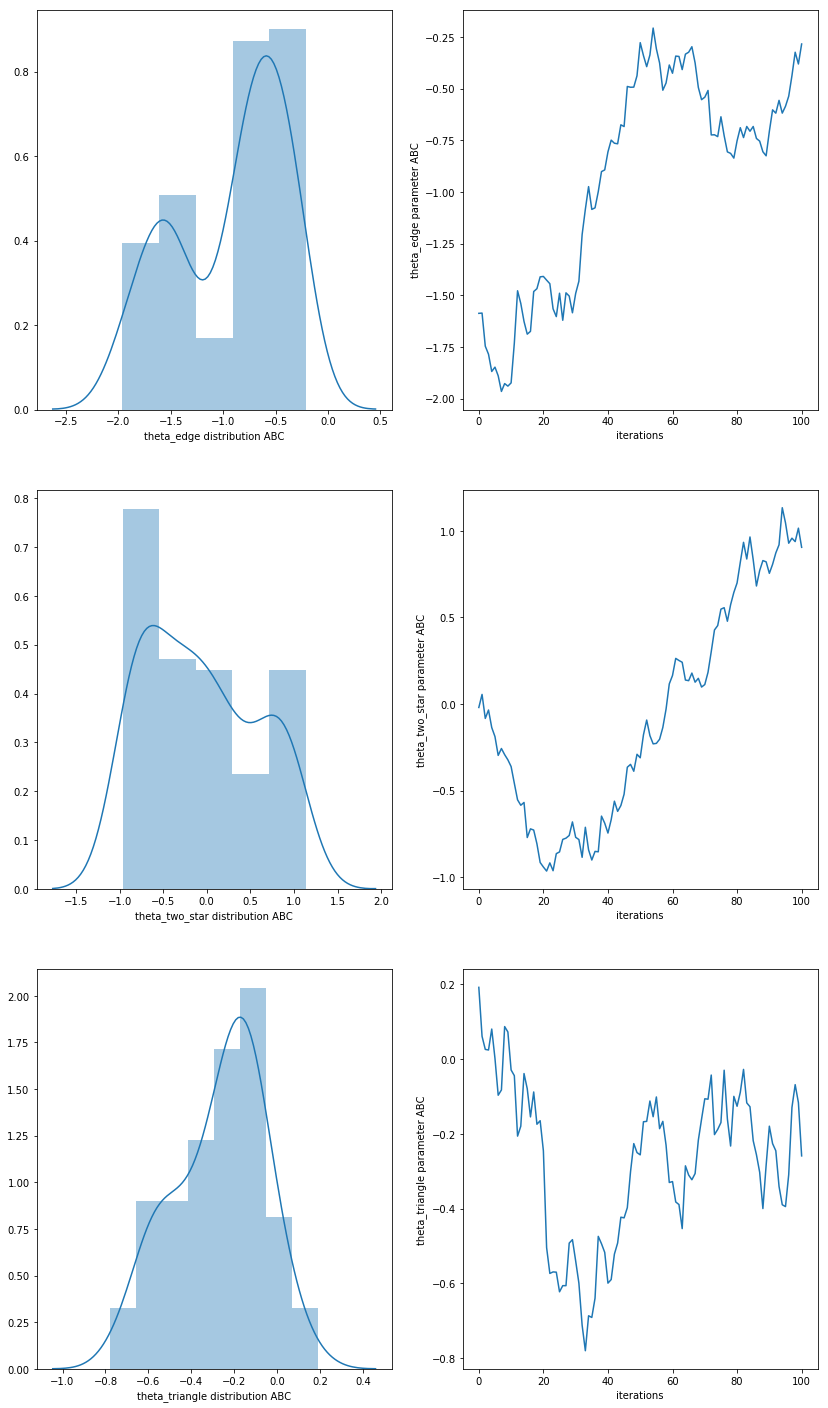

In [16]:
plot_marginals(data2, by=100)

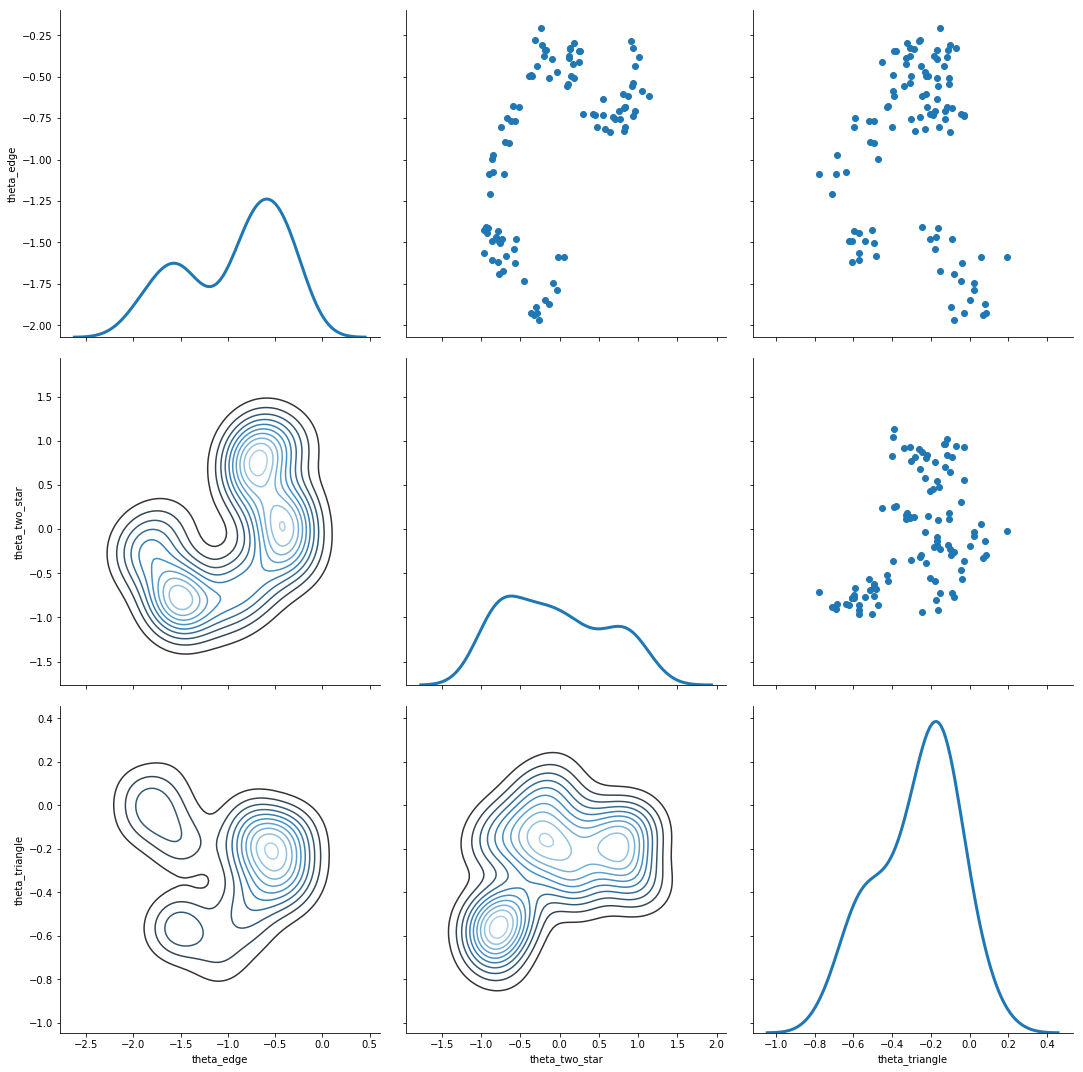

In [18]:
plot_dist(data2, by=100)

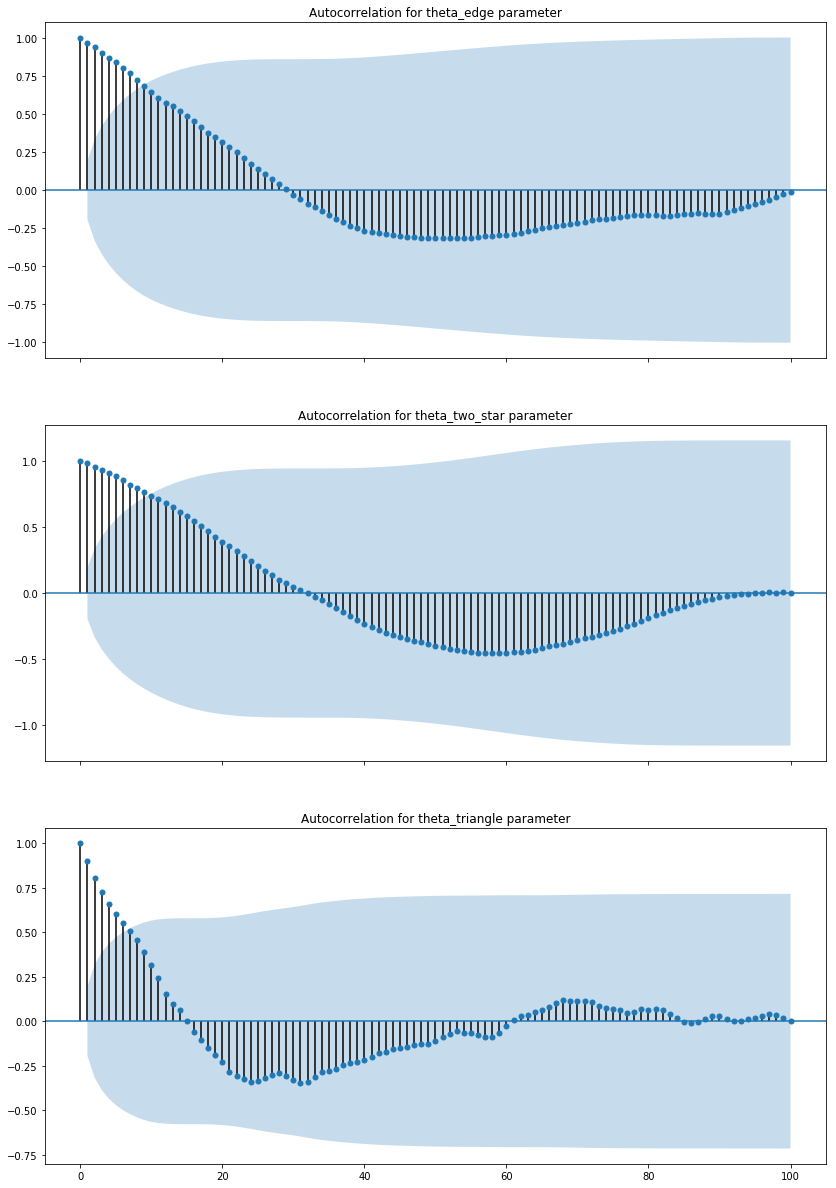

In [19]:
autocor(data2, by=100)